In [287]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
cwd = os.getcwd()
print(cwd)

/Users/fmichaud/PycharmProjects/medeas_simulations/two_population


In [288]:
simulation_subfolder = "convergence_speed"
cwd = os.getcwd()
simulation_subfolder = os.path.join(cwd,simulation_subfolder)
Ls = [int(10**(i/4)) for i in range(7,21)] #regulary space with 4 point between each order of magnitude
Ds = [0.01]
all_distances1= [[0,0]]
sigma1 = [[0,0,0]]
for L in Ls:
    for D in Ds:
        distance_summary_file = f'all_distance/L_{L}_D_{D}.dat'
        distances  = np.loadtxt(distance_summary_file)
        for distance in distances:
           all_distances1 = np.append(all_distances1,[[L,distance[0]]],axis = 0)
        sigma_within = np.std(distances[1:,0],ddof=1)
        sigma_outside = np.sqrt(np.sum((distances[1:,0]-2*D)**2)/len(distances[1:,0]))
        sigma1 = np.append(sigma1,[[L,sigma_within, sigma_outside]],axis = 0)
        
        
all_distances2= [[0,0]]
sigma2 = [[0,0,0]]
Ds = [0.1]
for L in Ls:
    for D in Ds:
        distance_summary_file = f'all_distance/L_{L}_D_{D}.dat'
        distances = np.loadtxt(distance_summary_file)
        for distance in distances:
            all_distances2 = np.append(all_distances2,[[L,distance[0]]],axis = 0)
        sigma_within = np.std(distances[1:,0],ddof=1)
        sigma_outside = np.sqrt(np.sum((distances[1:,0]-2*D)**2)/len(distances[1:,0]))
        sigma2 = np.append(sigma2,[[L,sigma_within, sigma_outside]],axis = 0)

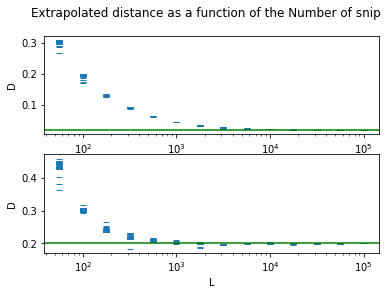

In [292]:
fig = plt.figure()
ax = fig.add_subplot(211)
ax.semilogx(all_distances1[1:,0],all_distances1[1:,1],"_")
ax.set_xlabel("L")
ax.set_ylabel("D")
ax.axhline(y=0.02,c="g")

ax = fig.add_subplot(212)
ax.semilogx(all_distances2[1:,0],all_distances2[1:,1],"_")
ax.set_xlabel("L")
ax.set_ylabel("D")
ax.axhline(y=0.2,c="g")
fig.suptitle("Extrapolated distance as a function of the Number of snip")
plt.savefig("convergence.pdf")


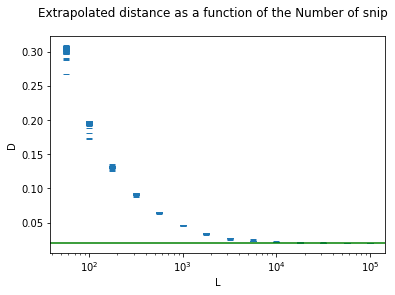

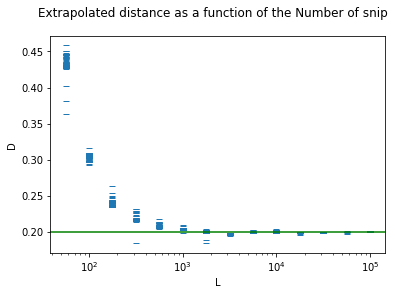

In [295]:
fig = plt.figure()

ax = fig.add_subplot(111)
#ax.set_ylim((0.08,0.2))
ax.semilogx(all_distances1[1:,0],all_distances1[1:,1],"_")
ax.set_xlabel("L")
ax.set_ylabel("D")
ax.axhline(y=0.02,c="g")

fig.suptitle("Extrapolated distance as a function of the Number of snip")
plt.savefig("convergence_D=0.1.pdf")

fig = plt.figure()

ax = fig.add_subplot(111)
#ax.set_ylim((0.08,0.2))
ax.semilogx(all_distances2[1:,0],all_distances2[1:,1],"_")
ax.set_xlabel("L")
ax.set_ylabel("D")
ax.axhline(y=0.2,c="g")

fig.suptitle("Extrapolated distance as a function of the Number of snip")
plt.savefig("convergence_D=1.pdf")

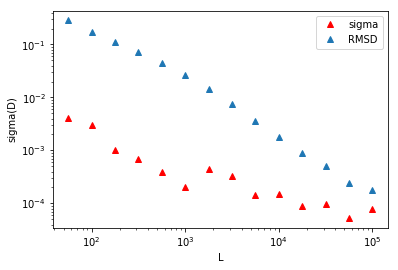

In [296]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(sigma1[1:,0],sigma1[1:,1],"r^",label="sigma")
ax.loglog(sigma1[1:,0],sigma1[1:,2],"^",label ="RMSD")
ax.legend()
ax.set_xlabel("L")
ax.set_ylabel("sigma(D)")
plt.savefig("RMSD_D=0.1.pdf")

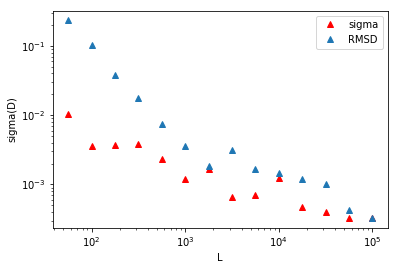

In [298]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(sigma2[1:,0],sigma2[1:,1],"r^",label="sigma")
ax.loglog(sigma2[1:,0],sigma2[1:,2],"^",label ="RMSD")
ax.legend()
ax.set_xlabel("L")
ax.set_ylabel("sigma(D)")
plt.savefig("RMSD_D=1.pdf")

In [246]:
sigma2

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.60000000e+01, 2.05862591e-02, 6.91306563e-02],
       [1.00000000e+02, 7.06803897e-03, 2.30108707e-02],
       [1.77000000e+02, 2.33509764e-02, 2.43630912e-02],
       [3.16000000e+02, 1.08873312e-02, 2.68822546e-02],
       [5.62000000e+02, 8.50907264e-03, 3.23964747e-02],
       [1.00000000e+03, 2.07796041e-03, 1.78563180e-02],
       [1.77800000e+03, 3.54326204e-03, 9.61328552e-03],
       [3.16200000e+03, 1.10018167e-02, 1.09163565e-02],
       [5.62300000e+03, 3.27071281e-03, 1.21268187e-02],
       [1.00000000e+04, 1.64327549e-03, 1.64809166e-03],
       [1.77820000e+04, 3.32908135e-03, 3.52504688e-03],
       [3.16220000e+04, 1.38919385e-03, 1.41362669e-03],
       [5.62340000e+04, 1.51623322e-03, 1.68994965e-03]])

In [324]:
val

array([ 1.56222955e-01, -1.37380620e-16,  1.44979515e-02,  1.78057178e-02,
        1.46924755e-02,  1.48180783e-02,  1.48537077e-02,  1.75473166e-02,
        1.49523291e-02,  1.74396657e-02,  1.50984880e-02,  1.73053876e-02,
        1.72340220e-02,  1.71849330e-02,  1.52168911e-02,  1.53103931e-02,
        1.53768590e-02,  1.54067881e-02,  1.54663476e-02,  1.55724737e-02,
        1.55960997e-02,  1.69202221e-02,  1.68618155e-02,  1.57293357e-02,
        1.57471093e-02,  1.57874856e-02,  1.58764324e-02,  1.59605890e-02,
        1.60242195e-02,  1.67759460e-02,  1.67111187e-02,  1.66809084e-02,
        1.66174065e-02,  1.61557556e-02,  1.65110803e-02,  1.64750516e-02,
        1.64012446e-02,  1.62394685e-02,  1.63131125e-02,  1.62863156e-02])

/Users/fmichaud/anaconda3/envs/medeas/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/fmichaud/anaconda3/envs/medeas/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  


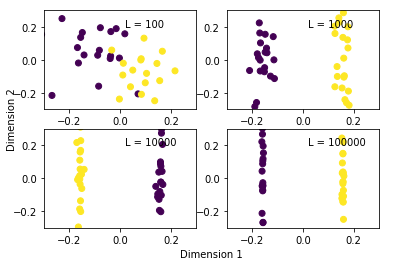

In [338]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
for iL, L in enumerate([100,1000,10000,100000]):
    val,vec = pickle.load(open(f'convergence_speed/L_{L}_D_0.1/pp.1.vecs.data',"rb"))
    ax = fig.add_subplot(2,2,iL+1)
    ax.set_xlim([-0.3,0.3])
    ax.set_ylim([-0.3,0.3])
    ax.text(0.02,0.2,f'L = {L}')
    ax.scatter(vec[:,0],vec[:,2],c = np.append(np.full(20,1),np.full(20,2)))
fig.show()
fig.savefig("PCA.pdf")
